



                                               Master ISID
                                                Dr Albert DIOMPY
                                                  2023-2024


# Package fanalysis

### Analyse en Composantes Principales
Ce travail a pour objectif de présenter rapidement les principales fonctionnalités offertes par le package fanalysis pour réaliser une Analyse en Composantes Principales.
Il suppose connu les soubassements théoriques de cette méthode.
Il ne s'attarde pas non plus sur l'interprétation du jeu de données, qui n'a pour but que de présenter les fonctionnalités du package.
2 approches sont présentées :

- Une approche "datamining" : l'ACP vise à décrire un jeu de données
- Une approche "machine learning" : l'ACP est utilisée comme méthode de réduction des données, le résultat servant d'entrée pour un modèle prédictif (nous ferons ici l'usage d'outils de scikit-learn).
### I. Approche Datamining
L'ACP a ici pour but de décrire un fichier de données.
Celui-ci est extrait du site de Ricco Rakotomalala (Université Lyon 2) :
http://eric.univ-lyon2.fr/%7Ericco/tanagra/fichiers/autos_acp.xls
Nous partons d'un fichier texte intitulé "pca_data.txt".
On importe la librairie pandas pour charger les données, ainsi que la classe PCA du package fanalysis.
Les données sont transformées en matrice de type numpy.ndarray.

Les données doivent se présenter sous la forme d'une matrice de valeurs numériques.

In [2]:
!pip install xlrd
!pip install fanalysis

In [3]:
import pandas as pd
from fanalysis.pca import PCA
%matplotlib inline

In [6]:
#Importation des indivus actives

# Load the data
df = pd.read_excel('Data_Methodes_Factorielles_python.xlsx', sheet_name='BURGER_ACP', index_col=0)

# Suppression des 2 dernières colonnes qui ne font pas partie de l'étude
df = df.iloc[:, :-2]

# Display the DataFrame
df

,Calories,Fat_Cal,Protein,Fat,Sat_Fat,Chol,Sodium,Carbs,Fiber,Sugar
ITEM,,,,,,,,,,
BK__Double_Stacker,3.2370,1.8497,0.1734,0.2081,0.0867,0.6358,6.0116,0.1676,0.0058,0.0405
BK_CHICKENFRIES(12pc),2.9412,1.5294,0.1647,0.1706,0.0294,0.3235,9.5882,0.1882,0.0176,0.0059
Buck_Double,2.5949,1.2658,0.1519,0.1392,0.0633,0.5380,4.6835,0.1772,0.0063,0.0380
CHICKENTENDERS_Sandwich,3.0986,1.7606,0.0845,0.1972,0.0317,0.2465,4.2958,0.2465,0.0070,0.0282
ChocolateFudgeSundae,1.6763,0.4046,0.0347,0.0462,0.0405,0.1156,1.3295,0.3064,0.0058,0.2601
DanishApple,3.6719,1.5625,0.0469,0.1719,0.0781,0.0391,4.0625,0.4844,0.0078,0.2266
Double_Cheeseburger,2.6316,1.3450,0.1520,0.1520,0.0702,0.5556,5.6140,0.1696,0.0058,0.0351
Double_Hamburger,2.4658,1.0959,0.1507,0.1233,0.0548,0.4795,3.5616,0.1918,0.0068,0.0411
Double_Bacon_Cheeseburger,2.8177,1.4917,0.1713,0.1657,0.0773,0.5801,6.3536,0.1602,0.0055,0.0387


In [7]:
# info base
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, BK__Double_Stacker to Tacos(2)
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Calories  17 non-null     float64
 1   Fat_Cal   17 non-null     float64
 2   Protein   17 non-null     float64
 3   Fat       17 non-null     float64
 4   Sat_Fat   17 non-null     float64
 5   Chol      17 non-null     float64
 6   Sodium    17 non-null     float64
 7   Carbs     17 non-null     float64
 8   Fiber     17 non-null     float64
 9   Sugar     17 non-null     float64
dtypes: float64(10)
memory usage: 1.5+ KB


In [8]:
# statistiques descriptives 
df.describe()

,Calories,Fat_Cal,Protein,Fat,Sat_Fat,Chol,Sodium,Carbs,Fiber,Sugar
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2.556871,1.227306,0.105506,0.136571,0.045782,0.327818,4.697971,0.232129,0.012100,0.074076
std,0.838330,0.539315,0.050876,0.059674,0.023299,0.221996,2.079425,0.108755,0.006707,0.093568
min,0.432100,0.216000,0.024700,0.024700,0.013300,0.039100,0.617300,0.043200,0.005500,0.005900
25%,2.210500,0.964900,0.061900,0.105300,0.029400,0.172400,3.561600,0.169600,0.006300,0.028200
50%,2.631600,1.265800,0.105300,0.139200,0.040500,0.246500,4.683500,0.194700,0.008800,0.038000
75%,3.098600,1.562500,0.151900,0.171900,0.063300,0.538000,5.955900,0.289100,0.017500,0.044200
max,3.671900,1.985300,0.173400,0.220600,0.086700,0.752200,9.588200,0.484400,0.028700,0.309700


### ACP avec fanalysis
On crée une instance de la classe PCA, en lui passant ici des étiquettes pour les lignes et les variables. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.

Le constructeur de la classe PCA possède un paramètre sdt_unit qui indique si l'ACP est réalisée :

- à partir de données centrées et réduites -> PCA(std_unit=True)
- à partir de données centrées mais non réduites -> PCA(std_unit=False)

Par défaut, la valeur du paramètre std_unit est fixée à True, car c'est le cas le plus courant.

In [9]:
#Demander une ACP normée
acp = PCA(std_unit=True, row_labels=df.index, col_labels=df.columns)
# acp à partir de la matrice numpy
# On estime le modèle en appliquant la méthode fit de la classe PCA sur le jeu de données.
acp.fit(df.values)

PCA(col_labels=Index(['Calories', 'Fat_Cal', 'Protein', 'Fat', 'Sat_Fat', 'Chol', 'Sodium',
       'Carbs', 'Fiber', 'Sugar'],
      dtype='object'),
    row_labels=Index(['BK__Double_Stacker', 'BK_CHICKENFRIES(12pc)', 'Buck_Double',
       'CHICKENTENDERS_Sandwich', 'ChocolateFudgeSundae', 'DanishApple',
       'Double_Cheeseburger', 'Double_Hamburger', 'Double_Bacon_Cheeseburger',
       'GardenSalad(nochicken)', 'KRAFT_MacaroniandCheese', 'MuffinBlueberry',
       'Original_Chicken_Sandwichw/oMayo', 'Rodeo_Cheeseburger',
       'SpicyCHICK_NCRISP_Sandwich', 'SpicyCHICK_NCRISP_Sandwichw/oMayo',
       'Tacos(2)'],
      dtype='object', name='ITEM'))

L'exécution de la méthode my_pca.fit(X) provoque a minima le calcul des attributs :

- my\_pca.eig\_ : valeurs propres
- my\_pca.row\_coord\_ : coordonnées des points lignes
- my\_pca.col\_coord\_ : coordonnées des points colonnes

### I.1. Analyse des valeurs propres
L'attribut my_pca.eig_ contient :

- en 1ère ligne : les valeurs propres en valeur absolue
- en 2ème ligne : les valeurs propres en pourcentage de la variance totale
- en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [10]:
# Affichage des valeurs propres
acp.eig_

array([[4.52737681e+00, 2.44546345e+00, 1.41010602e+00, 6.73523328e-01,
        4.83586846e-01, 3.46791440e-01, 9.39735274e-02, 1.76900742e-02,
        1.23762760e-03, 2.50881956e-04],
       [4.52737681e+01, 2.44546345e+01, 1.41010602e+01, 6.73523328e+00,
        4.83586846e+00, 3.46791440e+00, 9.39735274e-01, 1.76900742e-01,
        1.23762760e-02, 2.50881956e-03],
       [4.52737681e+01, 6.97284026e+01, 8.38294628e+01, 9.05646960e+01,
        9.54005645e+01, 9.88684789e+01, 9.98082142e+01, 9.99851149e+01,
        9.99974912e+01, 1.00000000e+02]])

Les valeurs propres peuvent être représentées graphiquement (par défaut : représentation en valeur absolue).

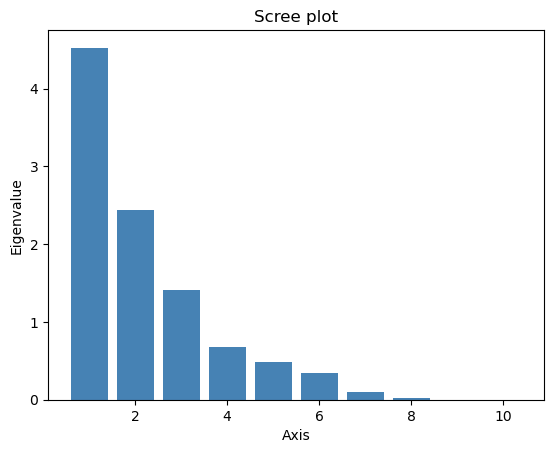

In [11]:
acp.plot_eigenvalues()

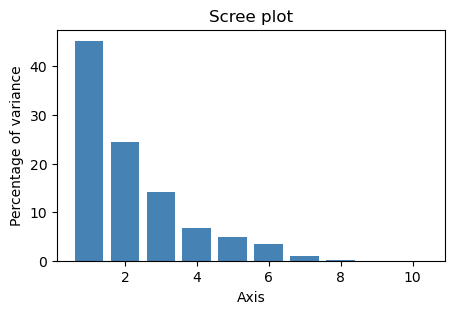

In [12]:
acp.plot_eigenvalues(type="percentage", figsize=(5,3))

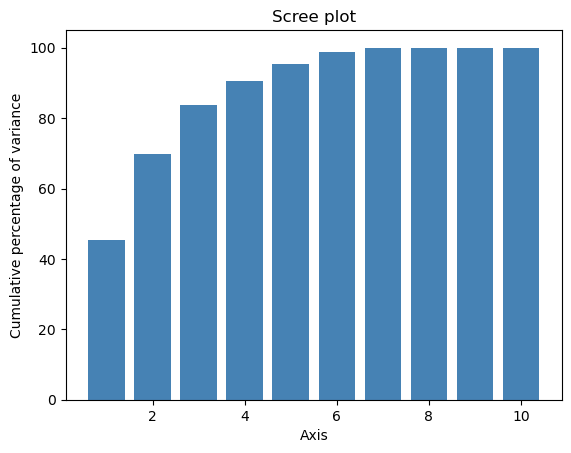

In [13]:
acp.plot_eigenvalues(type="cumulative")

#### L'examen des graphiques nous montre que les deux premiers facteurs contribuent à 60% (Premier facteur (Comp.1) : ~40% et Deuxième facteur (Comp.2) : ~20%) dans l'inertie totale. Cette analyse est confirmée par le graphique cumulative qui montre clairement que la jonction d'un facteur supplémentaire n'améne pas d'information significative.


### Informations sur les variables
 Cette partie apour objectif principale de caractériser des composantes par les variables c'est à dire d'analyse des relations entre les variables via les composantes

Quand l'objet my\_pca a été instancié, son paramètre stats a reçu la valeur True par défaut.
En conséquence, lors de l'exécution de la méthode my\_pca.fit(X), les statistiques suivantes ont été calculées :

- my\_pca.row\_contrib\_ : contributions des points lignes à la variance de l'axe
- my\_pca.col\_contrib\_ : contributions des points colonnes à la variance de l'axe
- my\_pca.row\_cos2\_ : cosinus carrés des points lignes
- my\_pca.col\_cos2\_ : cosinus carrés des points colonnes

Si l'on avait souhaité éviter le calcul de ces statistiques pour gagner du temps et économiser des ressources mémoire, il aurait fallu instancier :
my\_pca = PCA(stats=False)

Par défaut, les coordonnées des points lignes et colonnes, leurs contributions et cosinus carrés sont calculés sur l'ensemble des axes extraits de l'analyse.
On aurait toutefois pu spécifier le nombre d'axes à retenir via le paramètre n_components avec par exemple :
my\_pca = PCA(n_components=3)

 l'objet **acp.col_topandas()**  contient les informations globales sur les variables à savoir:
 - les cordonnées des variables sur les axes qui représentent  les corrélations aux différents axes
 - contributions des variables à la formations des axes 
 - la qualité de représentation des variables sur les axes 
 Ces informations sont essentielles dans l'interprétation des des résultats


In [14]:
info_var=acp.col_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7', 'col_coord_dim8',
       'col_coord_dim9', 'col_coord_dim10', 'col_contrib_dim1',
       'col_contrib_dim2', 'col_contrib_dim3', 'col_contrib_dim4',
       'col_contrib_dim5', 'col_contrib_dim6', 'col_contrib_dim7',
       'col_contrib_dim8', 'col_contrib_dim9', 'col_contrib_dim10',
       'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3', 'col_cos2_dim4',
       'col_cos2_dim5', 'col_cos2_dim6', 'col_cos2_dim7', 'col_cos2_dim8',
       'col_cos2_dim9', 'col_cos2_dim10'],
      dtype='object')

In [15]:
# Coordonées des variables sur les 2 premiers axes
info_var[['col_coord_dim1','col_coord_dim2']]

,col_coord_dim1,col_coord_dim2
Calories,-0.914058,-0.313750
Fat_Cal,-0.921694,-0.107219
Protein,-0.631428,0.693490
Fat,-0.919989,-0.090268
Sat_Fat,-0.691355,-0.049497
Chol,-0.707995,0.136949
Sodium,-0.655789,0.465303
Carbs,-0.297522,-0.855395
Fiber,0.310232,0.095834
Sugar,-0.056769,-0.931588


L'analogie avec le dataset des burgers peut être réalisée en considérant les coordonnées des variables sur les deux premiers axes principaux (dimensions 1 et 2) comme une représentation de l'impact relatif de chaque variable (comme les calories, les graisses, les protéines, etc.) sur la structure globale des données. Dans ce contexte, le premier facteur semble avoir une forte influence sur l'ensemble des variables, comme le montre les corrélations négatives avec des variables comme "Calories", "Fat_Cal", "Fat", etc. Ces variables ont tendance à être fortement corrélées entre elles et à avoir un effet commun dominant sur les burgers, similaire à l'analogie des véhicules où le premier facteur pourrait représenter une caractéristique générique comme la "taille" des véhicules, indépendamment de leurs autres propriétés.

Pour le deuxième facteur, il semble y avoir une distinction basée sur des variables comme "Carbs" et "Sugar", qui sont négativement corrélées à la dimension 2, et peuvent refléter des aspects plus spécifiques, comme la "légèreté" ou la "santé" d'un burger. Cependant, cette séparation pourrait être trompeuse si on ne prend pas en compte les interrelations complexes entre les variables. Comme dans l'exemple des véhicules, où on pourrait croire qu'il existe une opposition entre la "sportivité" et la "largeur", une inspection plus approfondie, par exemple à travers un graphique pairplot des variables, permettrait de clarifier que ce n'est qu'une illusion et que les variables ne se comportent pas de manière indépendante, mais sont influencées par la première dimension dominante.














In [16]:
import seaborn as sns
sns.pairplot(df)

**Remrque: Pour une meilleure lisibilité, on privilégie une vue synthétique avec le « cercle des
corrélations ». Ce sont les « directions » qui importent, d’où les flèches dans la représentation
graphique. Elles permettront de comprendre les positions relatives des observations dans la
« carte des individus »**

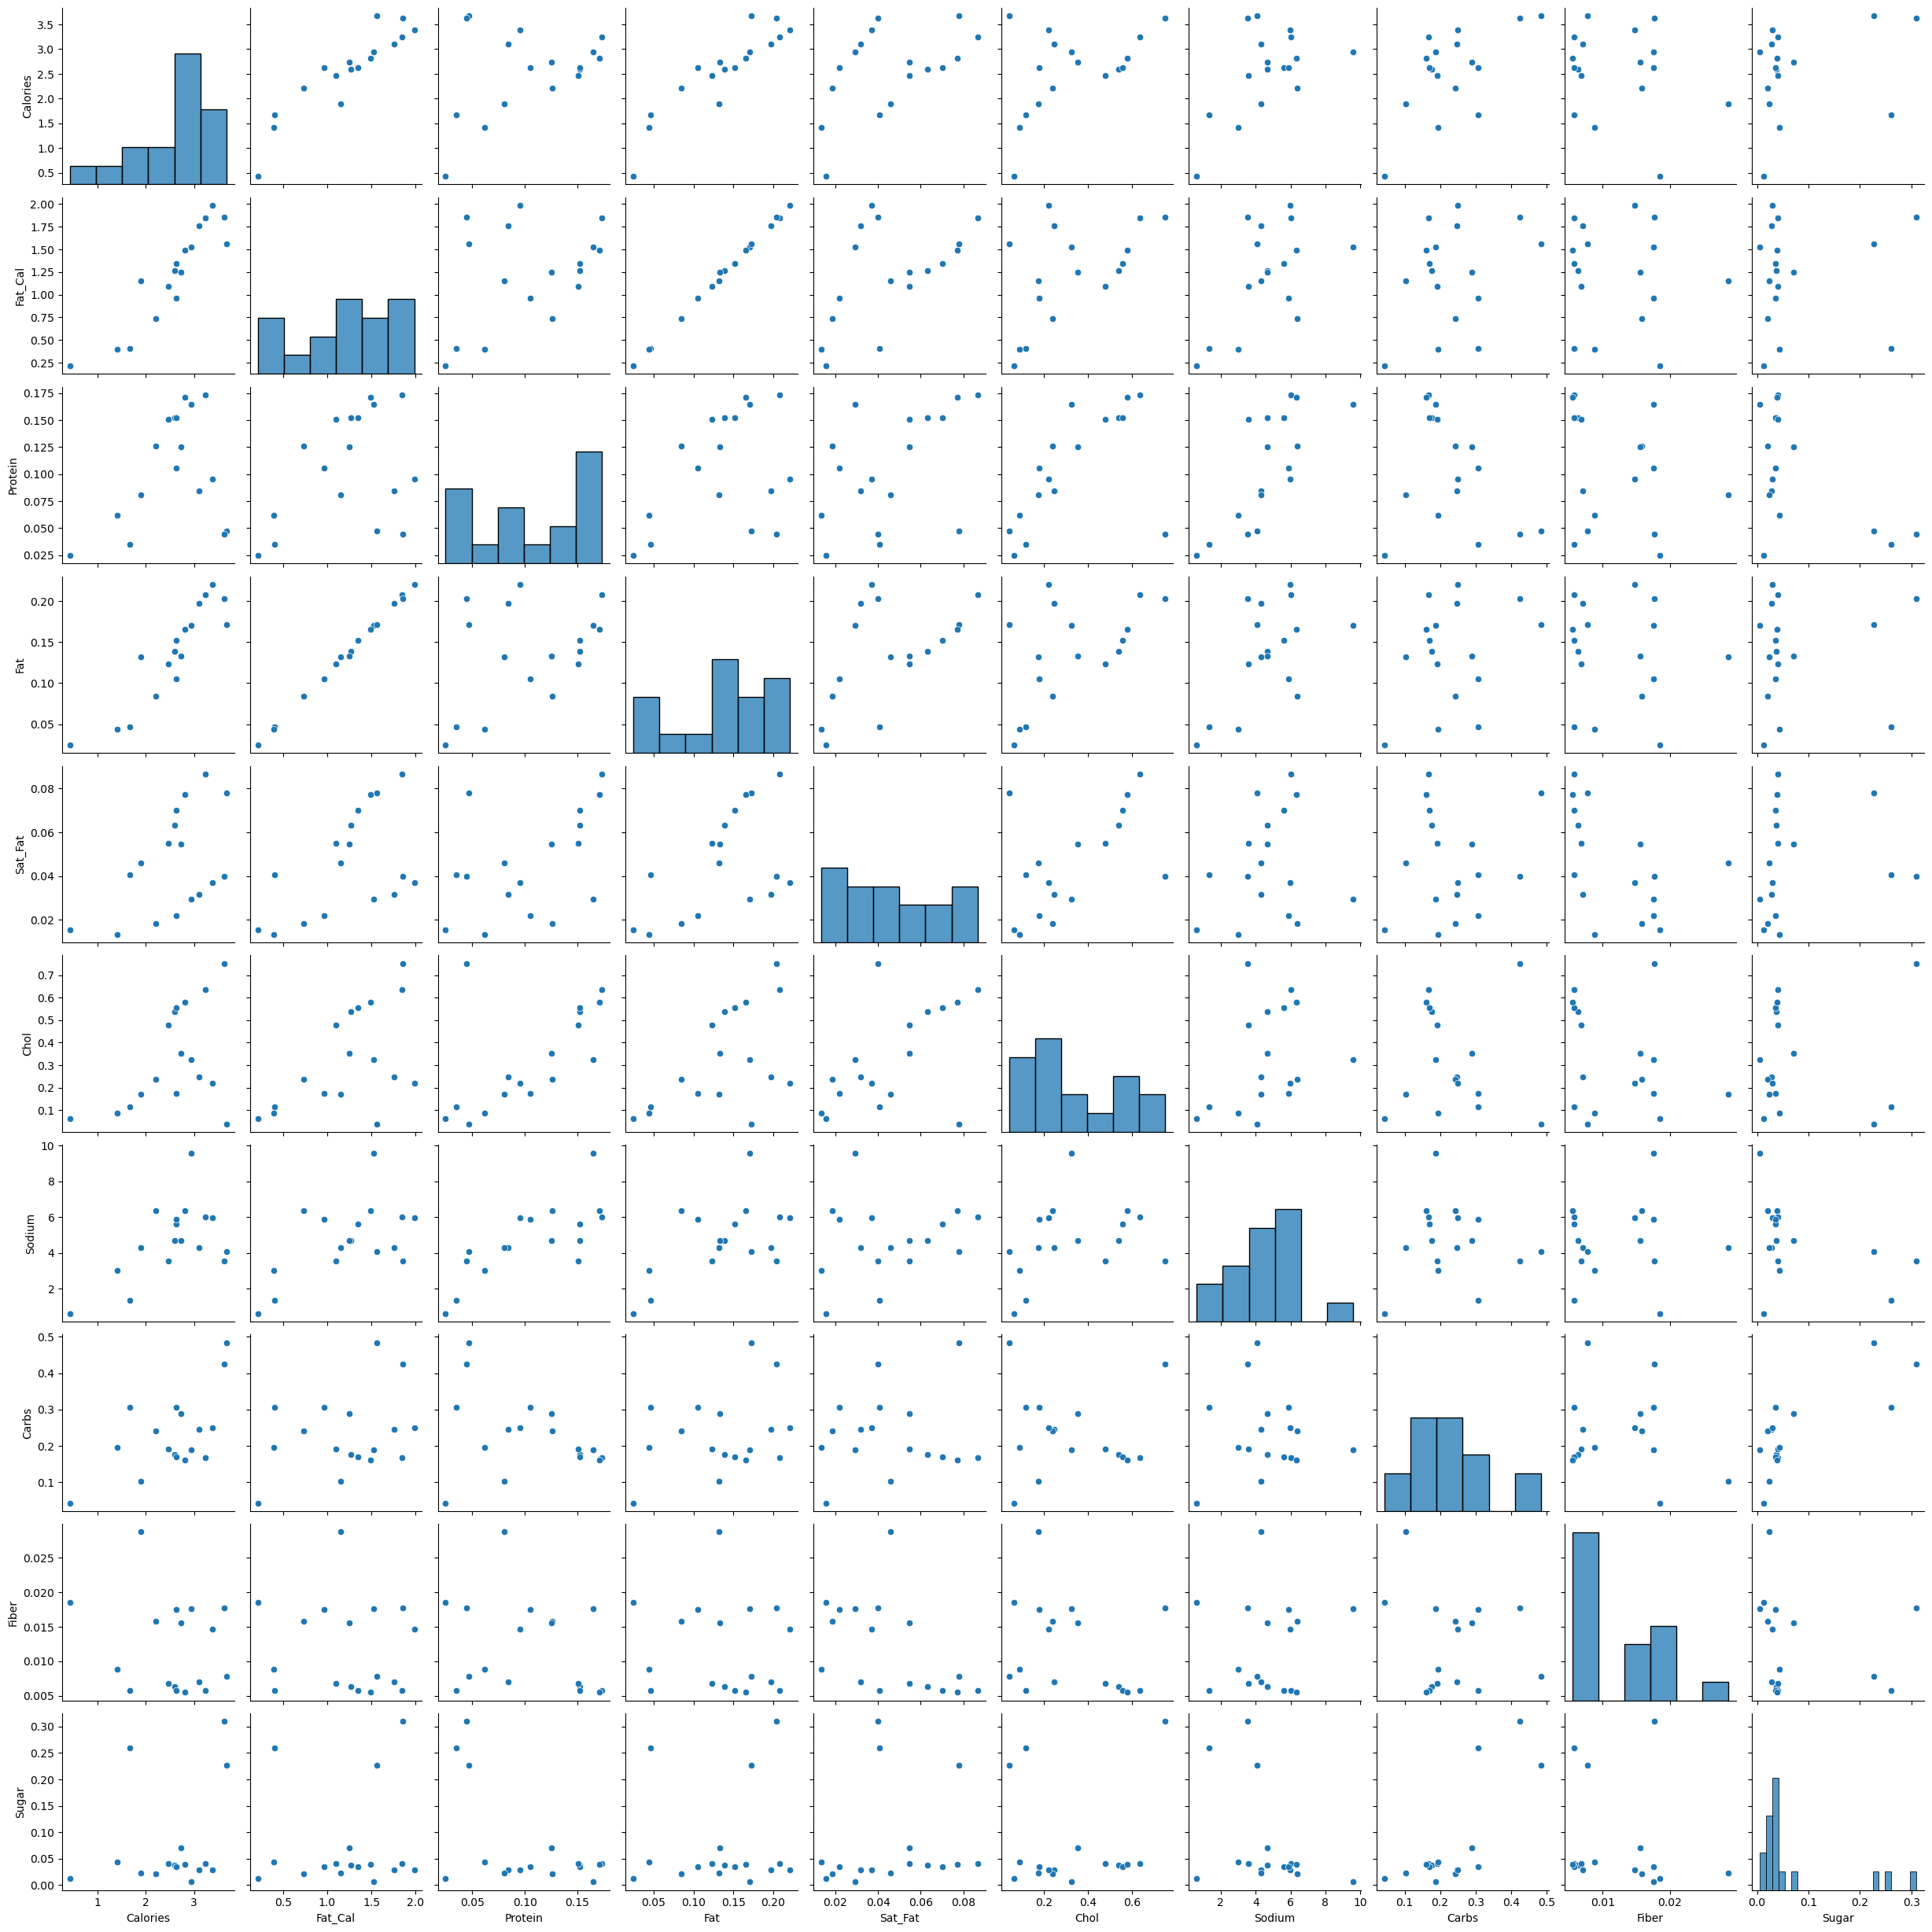

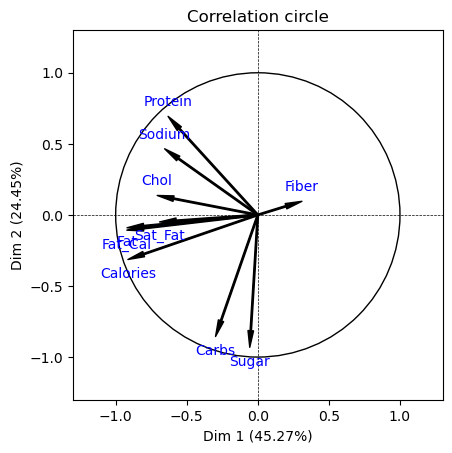

In [17]:
# Cercle de corrélation
acp.correlation_circle(num_x_axis=1, num_y_axis=2)

**Commentaires:** ...

Cosinus2
. Le COS2 désigne la qualité de la représentation des variables (𝑥𝑗) sur une composante.
Elle correspond au carré du coefficient de corrélation, elle est définie entre 0 et 1 :
### $$COS^2_{𝑗𝑘} =r^2_{j}(𝐹𝑘)$$
Il présente l’avantage de s’additionner d’un facteur à l’autre. Pour indiquer l’information de la
variable (𝑥𝑗) restituée sur les (q) premiers facteurs, nous faisons : 
### $$\Sigma_{k=1}^{q}COS^2_{jk}$$
Et lorsque nous considérons l’ensemble des (p) facteurs, nous avons capté toute l’information
portée par une variable :
### $$\Sigma_{k=1}^{p}COS^2_{jk}=1$$



In [18]:
# les cosinus2 pour la qualité de représentation
info_var[['col_cos2_dim1','col_cos2_dim2']]

,col_cos2_dim1,col_cos2_dim2
Calories,0.835502,0.098439
Fat_Cal,0.849520,0.011496
Protein,0.398702,0.480928
Fat,0.846379,0.008148
Sat_Fat,0.477972,0.002450
Chol,0.501257,0.018755
Sodium,0.430059,0.216507
Carbs,0.088519,0.731700
Fiber,0.096244,0.009184
Sugar,0.003223,0.867857


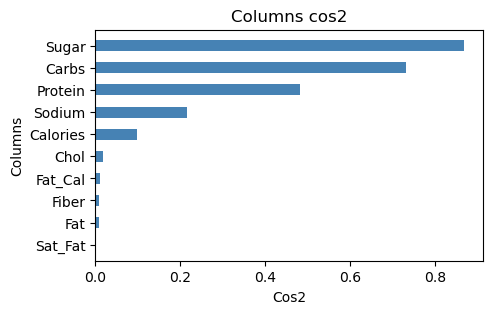

In [19]:
# On obtient le graphique sur le deuxième en changeant 1 par 2
acp.plot_col_cos2(num_axis=2, figsize=(5,3))


In [20]:
# Cumul des cosinus2 sur les deux premiers facteurs
info_var[['col_cos2_dim1','col_cos2_dim2']].cumsum(axis=1)

,col_cos2_dim1,col_cos2_dim2
Calories,0.835502,0.933941
Fat_Cal,0.849520,0.861016
Protein,0.398702,0.879630
Fat,0.846379,0.854527
Sat_Fat,0.477972,0.480421
Chol,0.501257,0.520013
Sodium,0.430059,0.646566
Carbs,0.088519,0.820219
Fiber,0.096244,0.105428
Sugar,0.003223,0.871079


**Commentaires:** Pour notre étude « Burgers », ...

### Contributions
 Les contributions matérialisent l’influence d’une variable dans la définition de
chaque composante. Elles sont basées également sur le carré des corrélations, mais normalisées
afin que leurs sommes sur chaque composante soit égale à 1.
Sachant que :
### $$\Sigma_{k=1}^{p}r^2_{j}(F_{k})=\lambda_{k}$$
La contribution de la variable (𝑥𝑗) au facteur (Fk) s’écrit :
### $$CRT_{jk}=\frac{r^2_{j}(F_{k})}{\lambda_{k}}$$

In [21]:
# Contribution des variables 
info_var[['col_contrib_dim1','col_contrib_dim2']]

,col_contrib_dim1,col_contrib_dim2
Calories,18.454437,4.025387
Fat_Cal,18.764076,0.470091
Protein,8.806464,19.666118
Fat,18.694687,0.333198
Sat_Fat,10.557361,0.100184
Chol,11.071698,0.766932
Sodium,9.499072,8.853407
Carbs,1.955196,29.920700
Fiber,2.125826,0.375555
Sugar,0.071183,35.488428


**Sans surprise, les variables les plus corrélées avec les facteurs sont celles qui pèsent le plus
dans leur définition.**

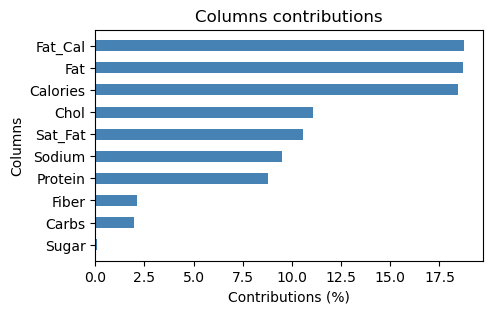

In [22]:
# On obtient le graphique sur le deuxième en changeant 1 par 2
acp.plot_col_contrib(num_axis=1, figsize=(5,3))


#### Remarque 1:
**En analyse en composantes principales, les COS2 et CTR apportent peu dans
l’interprétation des résultats par rapport à la corrélation des variables aux facteurs. En effet,
cette dernière étant bornée entre -1 et +1, elle permet déjà des comparaisons directes.**
#### Remarque 2:
 **Lors de la reconstitution des corrélations dans l’espace factoriel,
l’approximation sera d’autant meilleure que les COS2 des variables traitées seront élevés.**

### Informations sur les individus
**les informations sur les individus à l'image des variables se résument à leurs coordonnées sur les axes, leurs contributions et à leurs cosinus2**

In [23]:
# Coordonnées et autres informations
info_indiv=acp.row_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7', 'col_coord_dim8',
       'col_coord_dim9', 'col_coord_dim10', 'col_contrib_dim1',
       'col_contrib_dim2', 'col_contrib_dim3', 'col_contrib_dim4',
       'col_contrib_dim5', 'col_contrib_dim6', 'col_contrib_dim7',
       'col_contrib_dim8', 'col_contrib_dim9', 'col_contrib_dim10',
       'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3', 'col_cos2_dim4',
       'col_cos2_dim5', 'col_cos2_dim6', 'col_cos2_dim7', 'col_cos2_dim8',
       'col_cos2_dim9', 'col_cos2_dim10'],
      dtype='object')

In [24]:
# Coordonées des individus sur les 2 premiers axes
info_indiv[['row_coord_dim1','row_coord_dim2']]

,row_coord_dim1,row_coord_dim2
ITEM,,
BK__Double_Stacker,-3.127459,1.046610
BK_CHICKENFRIES(12pc),-1.366619,1.832960
Buck_Double,-0.971437,0.925507
CHICKENTENDERS_Sandwich,-0.784510,-0.346840
ChocolateFudgeSundae,2.871065,-2.461960
DanishApple,-1.174891,-3.486505
Double_Cheeseburger,-1.421410,1.082673
Double_Hamburger,-0.261705,0.716004
Double_Bacon_Cheeseburger,-2.107755,1.308678


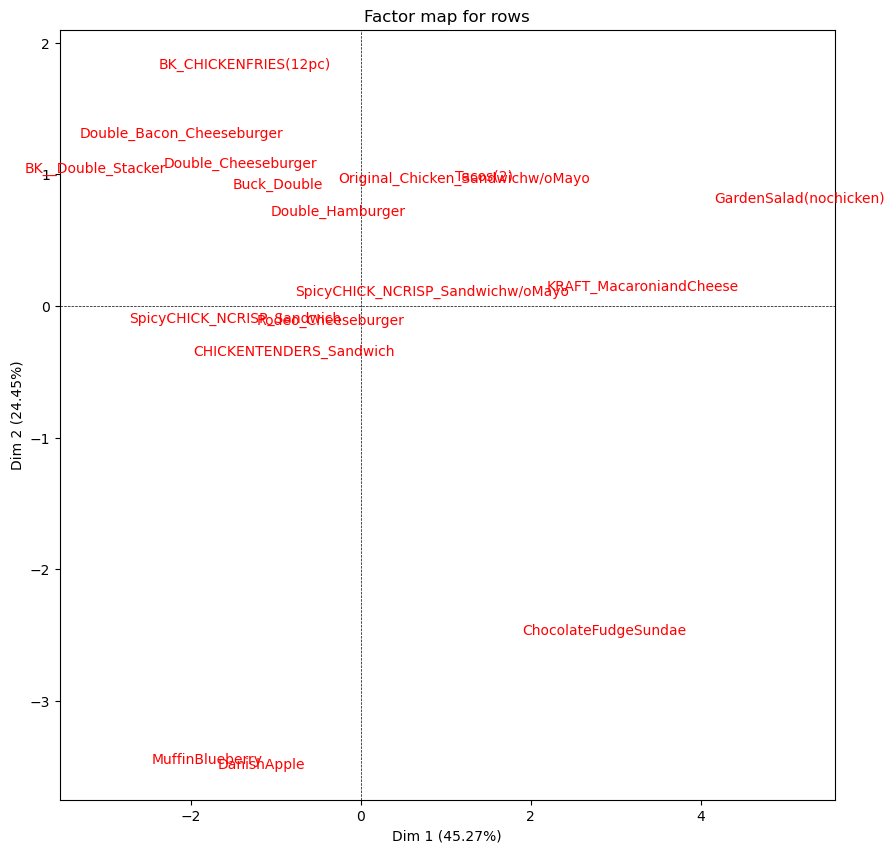

In [25]:
#carte des individus
acp.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(10,10))

**Commentaire:** ...


**Attention! Les librairies graphiques procèdent quasiment toujours à une mise à l’échelle
automatique pour que les points « remplissent » au mieux le canevas de présentation. De fait,
la lecture doit tenir compte des proportions de variance expliquées en abscisse (45.27%) et en
ordonnée (24.45%) pour éviter les conclusions intempestives.**

**C’est pour cette raison que je préconise systématiquement de fixer la même échelle en abscisse
et en ordonnée des graphiques factoriels. Les positions relatives sont alors ramenées à de plus
justes proportions, et reflètent plus fidèlement les écarts et leur nature.**


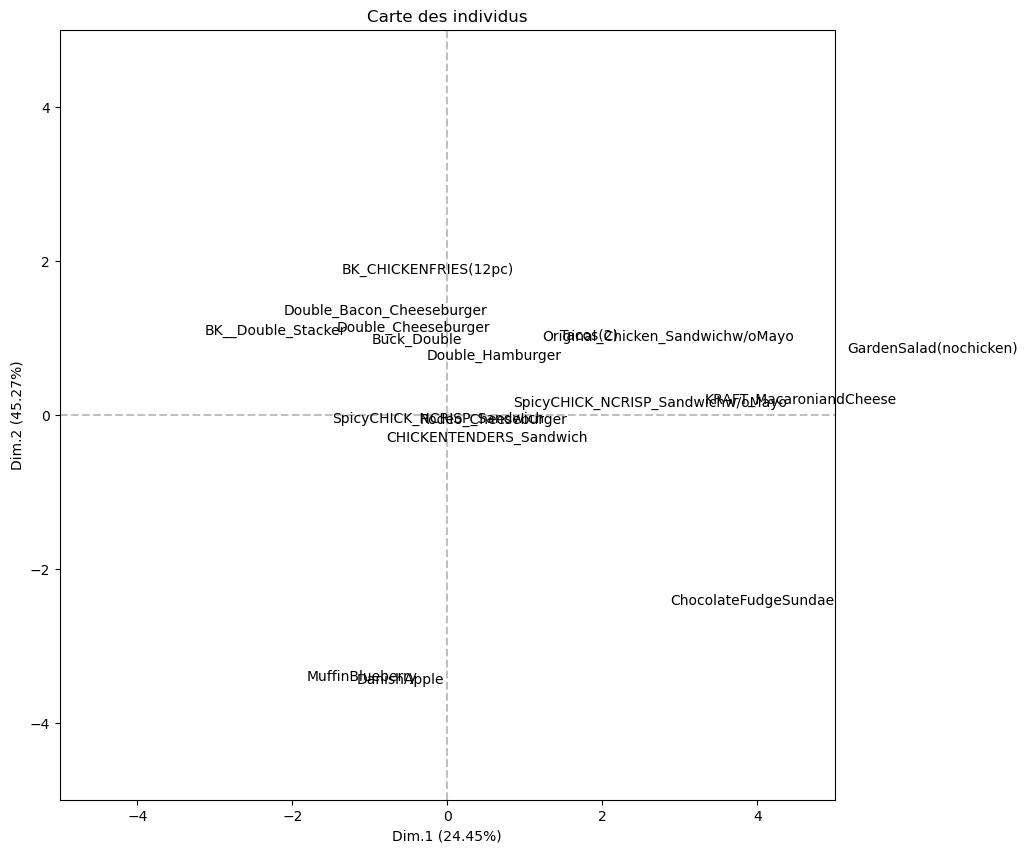

In [26]:
import matplotlib.pyplot as plt
coord= info_indiv[['row_coord_dim1','row_coord_dim2']]
#graphique avec les échelles carrées
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (24.45%)")
ax.set_ylabel("Dim.2 (45.27%)")
plt.title("Carte des individus")
for i in range(coord.shape[0]):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],coord.index[i])

plt.show()

### Projection des individus supplémentaires (à revoir)
La projection des individus supplémentaires (ou illustratifs selon la finalité poursuivie) est une
fonctionnalité importante de l’analyse en composantes principales. L’objectif est de positionner
de nouveau individus par rapport à ceux (les individus actifs, l’échantillon d’apprentissage,
l’échantillon de référence) qui ont contribué à la construction du repère factoriel.
On peut voir plusieurs motivations à cette démarche :
- Situer les positions des individus qui ont été collectés après coup.
- Identifier parmi ces individus ceux dont les caractéristiques diffèrent significativement
de l’échantillon de référence. On parle de détection de nouveautés (novelty detection,
« Détection des anomalies sous Python », mars 2020).
- Positionner des individus appartenant à une population différente ou spécifique
- Intégrer après coup les observations jugées trop atypiques ou influentes, qui étaient
susceptibles de fausser la construction du repère factoriel. On aurait pu écarter la
Renault 30 des calculs par exemple, du fait de son influence très marquée sur les 2
premiers facteurs, puis l’ajouter comme individu supplémentaire par la suite.

In [24]:
df1=pd.read_excel('autos-acp-diapos.xls', sheet_name='ind.illustratives', index_col=0)
df1

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Modele,,,,,,
Alfasud TI,1350,79,393,161,870,165
Audi 100,1588,85,468,177,1110,160
Simca 1300,1294,68,424,168,1050,152
Citroen GS Club,1222,59,412,161,930,151
Fiat 132,1585,98,439,164,1105,165
Lancia Beta,1297,82,429,169,1080,160
Peugeot 504,1796,79,449,169,1160,154
Renault 16 TL,1565,55,424,163,1010,140
Renault 30,2664,128,452,173,1320,180


In [25]:
df1.index

Index(['Alfasud TI', 'Audi 100', 'Simca 1300', 'Citroen GS Club', 'Fiat 132',
       'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Renault 30',
       'Toyota Corolla', 'Alfetta 1.66', 'Princess 1800', 'Datsun 200L',
       'Taunus 2000', 'Rancho', 'Mazda 9295', 'Opel Rekord', 'Lada 1300',
       'Peugeot 604', 'Peugeot 304 S'],
      dtype='object', name='Modele')

In [26]:
df_ind_supp=df1.drop(index=['Alfasud TI', 'Audi 100', 'Simca 1300', 'Citroen GS Club', 'Fiat 132',
       'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Renault 30',
       'Toyota Corolla', 'Alfetta 1.66', 'Princess 1800', 'Datsun 200L',
       'Taunus 2000', 'Rancho', 'Mazda 9295', 'Opel Rekord', 'Lada 1300'], axis=0)
df_ind_supp

,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Modele,,,,,,
Peugeot 604,2664,136,472,177,1410,180
Peugeot 304 S,1288,74,414,157,915,160


**On connaît bien ces véhicules (304 S, petite sportive ; 604, routière statutaire), on imagine très
bien leurs voisinages respectifs. Voyons si l’ACP saura les positionner correctement.
La fonction « .transform() » de l’objet PCA fait merveille ici, nous pouvons lui envoyer la
description brute des individus supplémentaires, sans préparation préalable. Nous obtenons les
coordonnées factorielles (2 observations, p = 6 facteurs).**

In [27]:
#coordonnées factorielles des individus supplémentaires
coordSup = acp.transform(df_ind_supp.values)
print(coordSup)

[[ 5.56329226 -0.33860928  0.46428878 -0.40214608  0.38981076  0.08102064]
 [-2.21224139 -1.25777905  0.09304388  0.35370189 -0.648528   -0.12473042]]


**Nous les plaçons dans le plan factoriel pour localiser leurs voisinages parmi les observations
actives**

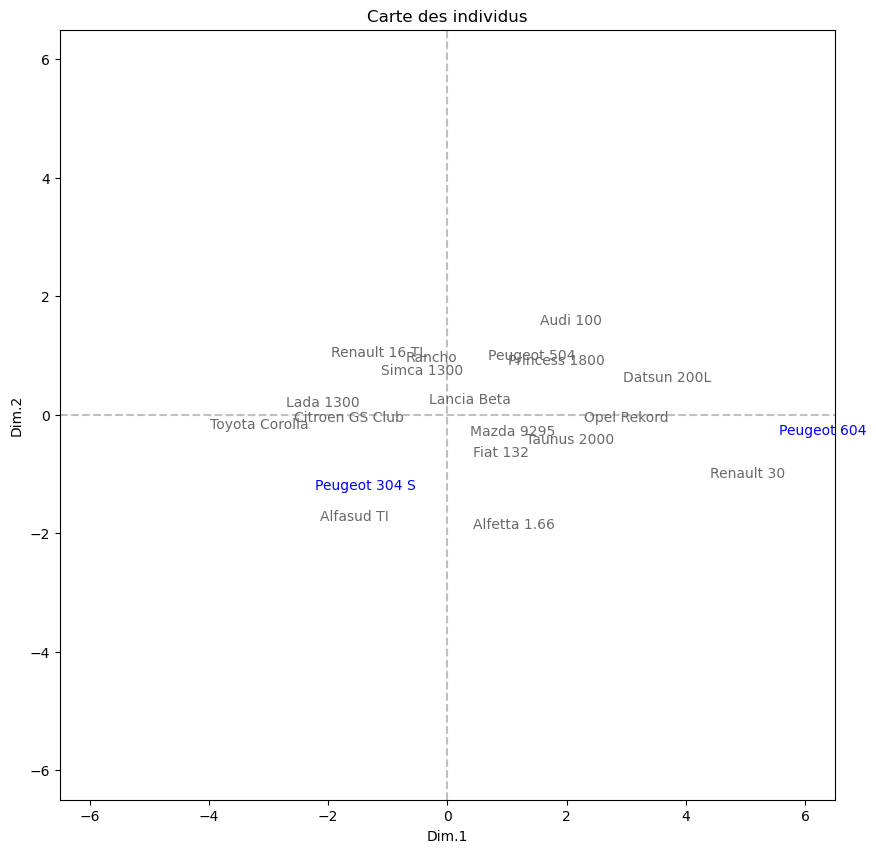

In [28]:
#position des points supplémentaires dans le plan
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-6.5,+6.5,-6.5,+6.5])
ax.plot([-6.5,+6.5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-6.5,+6.5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des individus")
#points actifs
for i in range(coord.shape[0]):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],coord.index[i],color="dimgray")
#points illutratifs
for i in range(df_ind_supp.shape[0]):
 ax.text(coordSup[i,0],coordSup[i,1],df_ind_supp.index[i],color="blue")

plt.show()


**le plot nous montre clairement  la « 304 S » est une petite sportive, a l’instar de l’Alfasud TI (première version). Quant à la 604, elle était bien une concurrente directe de la Renault 30. Ces résultats confortent la
légitimité des résultats de l’ACP menée sur les données « Autos ».**

### Variables illustratives quantitatives
**Les variables illustratives ont pour vocation de renforcer l’interprétation des composantes. Elles
ne sont pas utilisées pour leur construction, elles interviennent seulement après coup pour
mieux comprendre et commenter les résultats. Pour l’exemple des données « Autos », nous
avons utilisé en variables actives les caractéristiques intrinsèques des véhicules (largeur, poids,
puissance, etc.) pour élaborer les facteurs. Nous nous appuyons ensuite sur des variables
illustratives intégrant des considérations subjectives (prix, finition) ou calculées ex-post (rapport poids-puissance) pour entériner leurs positions relatives dans la représentation factorielle.**

In [29]:
#Pour les données « autos-acp-diapo », nous chargeons la 2ème feuille de calcul composée des variables
#illustratives pour les mêmes (n = 18) véhicules.
df2=pd.read_excel('autos-acp-diapos.xls', sheet_name='var.illustratives', index_col=0)
df2

,FINITION,PRIX,R.POID.PUIS,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Modele,,,,,,,,,
Alfasud TI,2_B,30570,11.012658,1350,79,393,161,870,165
Audi 100,3_TB,39990,13.058824,1588,85,468,177,1110,160
Simca 1300,1_M,29600,15.441176,1294,68,424,168,1050,152
Citroen GS Club,1_M,28250,15.762712,1222,59,412,161,930,151
Fiat 132,2_B,34900,11.275510,1585,98,439,164,1105,165
Lancia Beta,3_TB,35480,13.170732,1297,82,429,169,1080,160
Peugeot 504,2_B,32300,14.683544,1796,79,449,169,1160,154
Renault 16 TL,2_B,32000,18.363636,1565,55,424,163,1010,140
Renault 30,3_TB,47700,10.312500,2664,128,452,173,1320,180


In [30]:

df_var_illus=df2.drop(columns=['CYL', 'PUISS', 'LONG', 'LARG',
       'POIDS', 'V.MAX'])
df_var_illus

,FINITION,PRIX,R.POID.PUIS
Modele,,,
Alfasud TI,2_B,30570,11.012658
Audi 100,3_TB,39990,13.058824
Simca 1300,1_M,29600,15.441176
Citroen GS Club,1_M,28250,15.762712
Fiat 132,2_B,34900,11.275510
Lancia Beta,3_TB,35480,13.170732
Peugeot 504,2_B,32300,14.683544
Renault 16 TL,2_B,32000,18.363636
Renault 30,3_TB,47700,10.312500


In [31]:
df_var_illus=df_var_illus.rename(columns = {'R.POID.PUIS': 'RPOIDPUIS'})
df_var_illus

,FINITION,PRIX,RPOIDPUIS
Modele,,,
Alfasud TI,2_B,30570,11.012658
Audi 100,3_TB,39990,13.058824
Simca 1300,1_M,29600,15.441176
Citroen GS Club,1_M,28250,15.762712
Fiat 132,2_B,34900,11.275510
Lancia Beta,3_TB,35480,13.170732
Peugeot 504,2_B,32300,14.683544
Renault 16 TL,2_B,32000,18.363636
Renault 30,3_TB,47700,10.312500


**L’idée est de conforter les résultats de l’ACP avec ces nouvelles variables. Les indicateurs utilisés
ne sont pas les mêmes selon qu’elles sont quantitatives ou qualitatives.**



**La corrélation avec les facteurs est l’indicateur naturel pour positionner une
variable supplémentaire quantitative dans le repère factoriel. Si (y) est la variable à analyser, le
coefficient s’écrit :**

### $$r_{y}(F_{k})=\frac{\frac{1}{n}\Sigma(y_{i}-\bar{y})(F_{ik}-\bar{F_{k})}}{\sigma_{y}*\sigma_{F_{k}}}=\frac{\frac{1}{n}\Sigma(y_{i}-\bar{y})F_{ik}}{\sigma_{y}*\sqrt \lambda_{k}}$$
**En pratique, il s’agit de faire simplement appel aux librairies de calcul du langage utilisé. Sous
Python, nous utilisons corrcoef() de « Numpy ». Pour « prix » et « rapport poids-puissance »
sur les deux premiers facteurs, nous avons :**

In [32]:
import numpy as np
#corrélation de PRIX avec les 2 premiers facteurs
cPrix = np.corrcoef(df_var_illus.PRIX,acp.row_coord_[:,:2],rowvar=False)[0,1:]
print(cPrix)


[ 0.77247524 -0.08670844]


In [33]:
#corrélation de RPOIDPUIS avec les 2 premiers facteurs
cRPP = np.corrcoef(df_var_illus.RPOIDPUIS,acp.row_coord_[:,:2],rowvar=False)[0,1:]
print(cRPP)

[-0.58903888  0.67254512]



- **Le prix est fortement lié positivement au premier facteur, lequel est déterminé par la
cylindrée et l’encombrement des véhicules. Ce n’est pas vraiment étonnant.**
- **Le rapport poids puissance est un indicateur de performance. Plus il est faible, plus sportif
est le véhicule. Il est quasi-également lié aux deux facteurs : négativement au premier, c’est
tout à fait naturel puisque cette composante traduit la cylindrée et la puissance ;
positivement au second, en opposition à la vitesse maximum, ce que se conçoit très bien.
Insérer ces variables dans le cercle des corrélations donne une vision synthétique toujours bien
sympathique.**

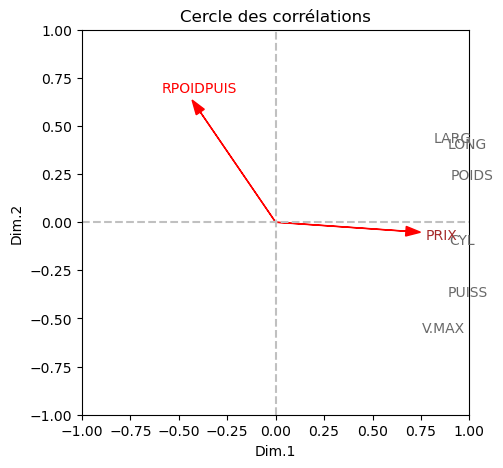

In [34]:
#placement des variables illustratives dans le cercle des corrélations
fig, ax = plt.subplots(figsize=(5,5))
ax.axis([-1,+1,-1,+1])
ax.plot([-1,+1],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1,+1],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Cercle des corrélations")
#variables actives
for i in range(df.shape[1]):
 ax.text(acp.col_coord_[i,0],acp.col_coord_[i,1],df.columns[i],color="dimgray")
#variables illustratives
ax.text(cPrix[0],cPrix[1],'PRIX',color='brown')
ax.arrow(0,0,cPrix[0]-0.1,cPrix[1]+0.04,color='r',head_width=0.05)
ax.text(cRPP[0],cRPP[1],'RPOIDPUIS',color="red")
ax.arrow(0,0,cRPP[0]+0.2,cRPP[1]-0.1,color='r',head_width=0.05)


- **Le traitement des variables illustratives qualitatives s’apparente à une analyse de variance à 1
facteur : l’objectif est d’apprécier dans quelle mesure les moyennes
conditionnelles définies par les groupes associés aux modalités sont suffisamment écartées sur
le facteur étudié.** 

- **Nous disposons d’un indicateur global, le carré du rapport de corrélation ; et
d’un indicateur par groupe, la valeur test (« Interpréter la valeur-test », avril 2008).**
- **Moyennes conditionnelles – Coordonnées factorielles. Les moyennes conditionnelles (𝑦̅𝑔𝑘)
constituent le point de départ de l’analyse, où « g » désigne une des modalités de la variable
supplémentaire (y, à G catégories), « k » le facteur sur lequel nous travaillons.**

### $$\bar Y_{gk}=\frac{1}{n_{g}}\Sigma_{i:y_{i}=g}F_{ik}$$

##### Où (ng) est l’effectif du groupe « g ».
Concrètement, pour la variable illustrative FINITION sur le premier facteur, nous calculons les
effectifs par groupe et les moyennes conditionnelles.

In [35]:
#data frame temporaire
df3 = df_var_illus.copy()
df3['F1'] = acp.row_coord_[:,0]
df3['F2'] = acp.row_coord_[:,1]

In [36]:
df3

,FINITION,PRIX,RPOIDPUIS,F1,F2
Modele,,,,,
Alfasud TI,2_B,30570,11.012658,-2.138924,-1.785681
Audi 100,3_TB,39990,13.058824,1.561459,1.527040
Simca 1300,1_M,29600,15.441176,-1.119385,0.674505
Citroen GS Club,1_M,28250,15.762712,-2.573742,-0.112884
Fiat 132,2_B,34900,11.275510,0.427855,-0.695567
Lancia Beta,3_TB,35480,13.170732,-0.304238,0.196149
Peugeot 504,2_B,32300,14.683544,0.683928,0.933057
Renault 16 TL,2_B,32000,18.363636,-1.948493,0.980448
Renault 30,3_TB,47700,10.312500,4.409735,-1.063633


In [37]:
#effectif par groupe de FINITION
n_g = pd.pivot_table(df3,values='F1',index='FINITION',aggfunc='count')
print(n_g)

          F1
FINITION    
1_M        5
2_B        7
3_TB       6


In [38]:
#moyennes conditionnelles pour le 1er facteur
m_1 = pd.pivot_table(df3,values='F1',index='FINITION',aggfunc='mean')
print(m_1)


                F1
FINITION          
1_M      -2.000355
2_B       0.235313
3_TB      1.392430


In [39]:
#moyennes conditionnelles pour le 2nd facteur
m_2 = pd.pivot_table(df3,values='F2',index='FINITION',aggfunc='mean')
print(m_2)

                F2
FINITION          
1_M       0.022579
2_B      -0.045271
3_TB      0.034001


**Ces moyennes conditionnelles correspondent également aux coordonnées factorielles. Plaçonsles dans notre repère pour disposer d’une vision d’ensemble.**

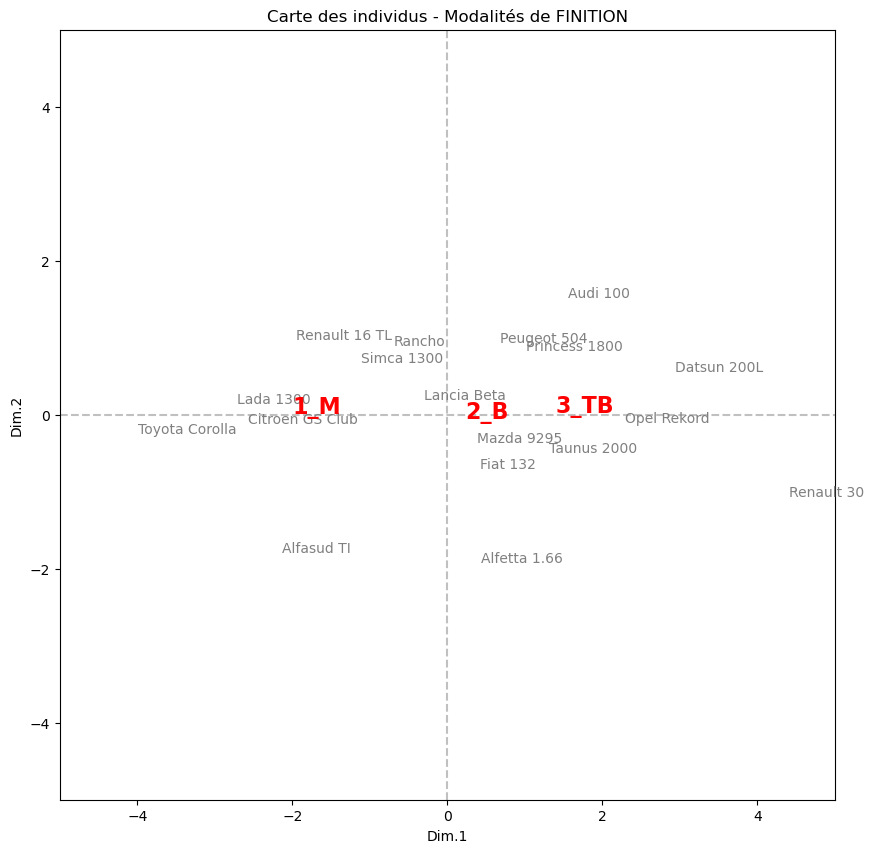

In [40]:
#représentation graphique avec les positions
#des points supplémentaires dans le plan
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des individus - Modalités de FINITION")
#points actifs
for i in range(coord.shape[0]):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],coord.index[i],color="gray")

#position des modalités de la variable illustrative
for g in range(len(m_1.index)):
 ax.text(m_1.F1[g],m_2.F2[g],m_1.index[g],color="red",weight="bold",fontsize=16)

plt.show()

**Manifestement, les niveaux de FINITION se distingue fortement sur le 1er facteur, quasiment
pas sur le 2nd.Elle (la finition) est intimement liée à la notion de « gamme » de véhicules mis en
avant lors de la lecture des facteurs. Plus le véhicule monte en gamme, plus élevé est le niveau
de finition.**

### II. Approche Machine Learning
Ici, l'objectif est d'utiliser l'Analyse en Composantes Principales en tant que méthode de prétraitement.

La classe PCA implémente les méthodes fit, transform et fit_transform bien connues des utilisateurs de scikit-learn.

Il est ici judicieux de fixer le paramètre stats à False pour gagner en temps de traitement et en ressources mémoire.

In [41]:
df2

,FINITION,PRIX,R.POID.PUIS,CYL,PUISS,LONG,LARG,POIDS,V.MAX
Modele,,,,,,,,,
Alfasud TI,2_B,30570,11.012658,1350,79,393,161,870,165
Audi 100,3_TB,39990,13.058824,1588,85,468,177,1110,160
Simca 1300,1_M,29600,15.441176,1294,68,424,168,1050,152
Citroen GS Club,1_M,28250,15.762712,1222,59,412,161,930,151
Fiat 132,2_B,34900,11.275510,1585,98,439,164,1105,165
Lancia Beta,3_TB,35480,13.170732,1297,82,429,169,1080,160
Peugeot 504,2_B,32300,14.683544,1796,79,449,169,1160,154
Renault 16 TL,2_B,32000,18.363636,1565,55,424,163,1010,140
Renault 30,3_TB,47700,10.312500,2664,128,452,173,1320,180


In [42]:
# posons X la matrice des variables explicatives
X = df2.iloc[:, 3:9].values
X

array([[1350,   79,  393,  161,  870,  165],
       [1588,   85,  468,  177, 1110,  160],
       [1294,   68,  424,  168, 1050,  152],
       [1222,   59,  412,  161,  930,  151],
       [1585,   98,  439,  164, 1105,  165],
       [1297,   82,  429,  169, 1080,  160],
       [1796,   79,  449,  169, 1160,  154],
       [1565,   55,  424,  163, 1010,  140],
       [2664,  128,  452,  173, 1320,  180],
       [1166,   55,  399,  157,  815,  140],
       [1570,  109,  428,  162, 1060,  175],
       [1798,   82,  445,  172, 1160,  158],
       [1998,  115,  469,  169, 1370,  160],
       [1993,   98,  438,  170, 1080,  167],
       [1442,   80,  431,  166, 1129,  144],
       [1769,   83,  440,  165, 1095,  165],
       [1979,  100,  459,  173, 1120,  173],
       [1294,   68,  404,  161,  955,  140]], dtype=int64)

In [43]:
# y = labels oubien variable à expliquer
y = df2.iloc[:, 1].values
y

array([30570, 39990, 29600, 28250, 34900, 35480, 32300, 32000, 47700,
       26540, 42395, 33990, 43980, 35010, 39450, 27900, 32700, 22100],
      dtype=int64)

In [44]:
pca = PCA(stats=False)

In [45]:
pca.fit(X)

PCA(stats=False)

In [46]:
pca.transform(X)

array([[-2.13892361, -1.78568102, -0.57186228, -0.20192734,  0.30135696,
        -0.05392079],
       [ 1.56145859,  1.52704027, -1.31527135,  0.21135154, -0.14851614,
         0.32723844],
       [-1.11938528,  0.67450517, -0.4565881 ,  0.16762584,  0.37536398,
        -0.27180323],
       [-2.5737417 , -0.11288416, -0.1485698 ,  0.01734322, -0.22685322,
        -0.26347623],
       [ 0.4278552 , -0.69556731,  0.19328567,  0.62775448, -0.26350531,
         0.03715265],
       [-0.30423764,  0.19614878, -0.67580317,  0.55594137,  0.44508594,
        -0.20008299],
       [ 0.6839285 ,  0.93305677,  0.25682308, -0.20313429, -0.20865165,
        -0.15389175],
       [-1.94849257,  0.98044805,  0.61957488, -0.63031916, -0.29316513,
        -0.10864179],
       [ 4.40973457, -1.06363317,  0.59352842, -0.84724778,  0.37488967,
        -0.04399657],
       [-3.98578242, -0.23624042,  0.30313336, -0.2651218 , -0.27842846,
         0.32889199],
       [ 0.43765819, -1.91244816, -0.02494224,  0.

In [47]:
# pca.fit_transform(X)

### Le cœur d’un pipeline d’apprentissage automatique consiste à fractionner une tâche d’apprentissage automatique en un flux de travail de plusieurs étapes. Chaque étape est un composant gérable qui peut être développé, optimisé, configuré et automatisé individuellement. Les étapes sont connectées via des interfaces bien définies. Le service du pipeline orchestre automatiquement toutes les dépendances entre les étapes du pipeline


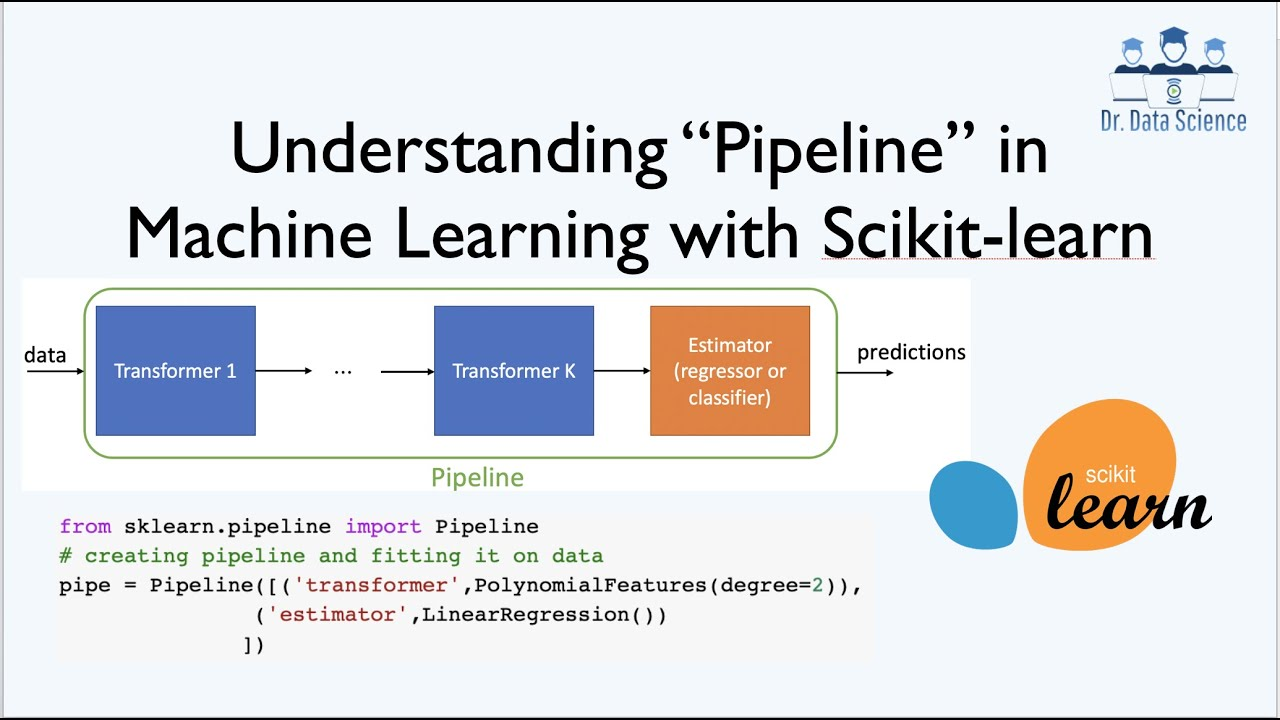

### Intégration dans une Pipeline de scikit-learn
La class PCA peut être intégrée dans une Pipeline de scikit-learn.
Dans le cadre de notre exemple, nous cherchons à prédire la 8ème variable (variable PRIX) à partir des 6 premières variables du jeu de données.
PRIX est une variable quantitative.
Pour la prédire, nous allons utiliser un modèle de régression linéaire multiple, qui prendra en input des axes issus d'une Analyse en Composantes Principales pratiquée sur les données brutes.
Dans un premier temps, et de façon tout à fait arbitraire, nous fixons le nombre de composantes extraites à 4.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

GridSearchCV implémente une méthode "fit" et une méthode "score". Il implémente également "score_samples", "predict", "predict_proba", "decision_function", "transform" et "inverse_transform" s'ils sont implémentés dans l'estimateur utilisé.

Les paramètres de l'estimateur utilisé pour appliquer ces méthodes sont optimisés par une recherche sur grille validée par recoupement sur une grille de paramètres.
https://runebook.dev/fr/docs/scikit_learn/modules/generated/sklearn.model_selection.gridsearchcv

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [49]:
# Construction de la Pipeline
# On enchaine une Analyse en Composantes Prnicipales (4 axes retenus) puis une régression linéaire multiple
pipe = Pipeline([("pca", PCA(n_components=4, stats=False)), ("linear_regression", LinearRegression())])

In [50]:
# Estimation du modèle
pipe.fit(X, y)

Pipeline(steps=[('pca', PCA(n_components=4, stats=False)),
                ('linear_regression', LinearRegression())])

In [51]:
# Prédiction sur l'échantillon de test
print(pipe.predict(X))

[28778.47166651 35726.0600918  31011.95297996 28033.41003637
 37806.88571481 34114.82070564 34931.02152346 27901.90893024
 43330.89903245 24545.70725329 38661.65482425 34794.41267099
 44874.06372338 35323.75414906 33995.01296845 35061.73868418
 37741.70392817 28221.52111698]


Le paramètre n_components peut faire l'objet d'une optimisation via GridSearchCV de scikit-learn.
Nous reconstruisons donc une Pipeline, sans spécifier de valeur a priori pour n_components.

In [52]:
# Reconstruction d'une Pipeline, sans spécifier de valeur a priori pour n_components
pipe2 = Pipeline([("pca", PCA(stats=False)), ("linear_regression", LinearRegression())])

In [53]:
# Estimation du modèle 2
pipe2.fit(X, y)

Pipeline(steps=[('pca', PCA(stats=False)),
                ('linear_regression', LinearRegression())])

In [54]:
# Prédiction sur l'échantillon d'apprentissage
print(pipe2.predict(X))

[29616.10867236 36259.65464946 31411.14922499 26445.75074645
 37042.99657626 34972.83432923 33749.14462282 26579.9571656
 44445.57655539 24650.24125571 38270.46181151 34830.41842394
 44872.42274919 36343.488685   35638.06479235 32233.42043584
 37103.49511476 30389.81418915]


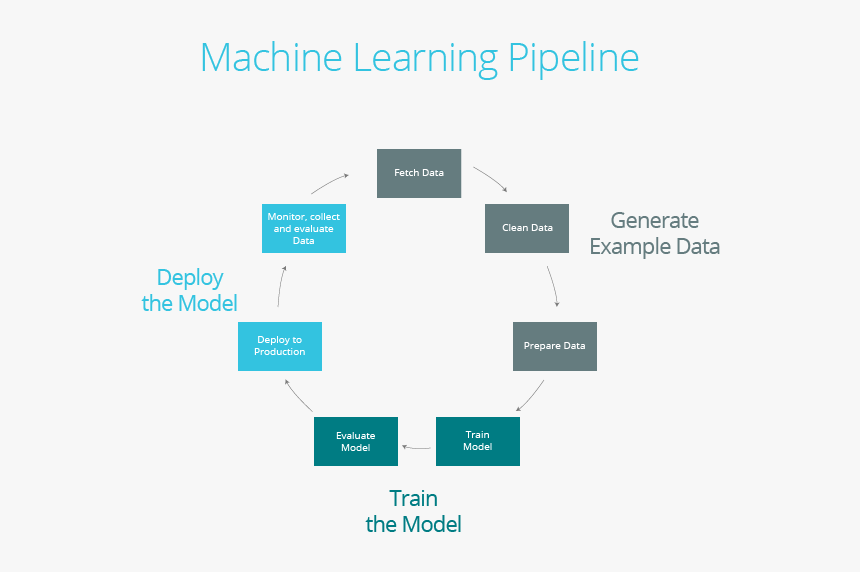

### Travail à faire:

1- Evaluer le modèle à travers les métriques adéquates

2- Prédire le prix des voitures Peugeot 604 et Peugeot 304 S à partir de leur caractéristique